This project analyzes a world population [dataset](https://www.kaggle.com/datasets/iamsouravbanerjee/world-population-dataset) of population of 234 countries or regions from 1970 to 2022. In this analysis, python's Pandas and Matplotlib libraries and PowerBI were used to visualize key trends and insights from the dataset. The project begins by addressing null and unique values in each column then exploring the distribution of populations across countries, using summary statistics and boxplots to identify disparities in global population density. Further, the population growth of the 10 most populous countries and their unique socioeconomic characteristics were studied to suggest a potential solution to population clustering. A polynomial regression model was built and used to predict the population of India and China in 2030, 2040, and 2050, testing the accuracy of past predictions. Lastly, the project concludes by examining the total population growth of each continent and providing insights from a socioeconomic standpoint to better understand the global demographic shifts from 1970 to 2022.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from numpy.polynomial.polynomial import Polynomial
import numpy as np
from PIL import Image

The dataset contains country name and code, capital, continent and populations (1970, 1980, 1990, 2000, 2010, 2015, 2020 and 2022), rank by population, area, population density, growth rate and world population percentage.

In [2]:
df = pd.read_csv(r"C:\Users\Nahye\OneDrive - University of Toronto\Documents\Project\World Population\world_population.csv")
df

,Rank,CCA3,Country,Capital,Continent,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
0,36,AFG,Afghanistan,Kabul,Asia,41128771.0,38972230.0,33753499.0,28189672.0,19542982.0,10694796.0,12486631.0,10752971.0,652230.0,63.0587,1.0257,0.52
1,138,ALB,Albania,Tirana,Europe,2842321.0,2866849.0,2882481.0,2913399.0,3182021.0,3295066.0,2941651.0,2324731.0,28748.0,98.8702,0.9957,0.04
2,34,DZA,Algeria,Algiers,Africa,44903225.0,43451666.0,39543154.0,35856344.0,30774621.0,25518074.0,18739378.0,13795915.0,2381741.0,18.8531,1.0164,0.56
3,213,ASM,American Samoa,Pago Pago,Oceania,44273.0,46189.0,51368.0,54849.0,58230.0,47818.0,32886.0,27075.0,199.0,222.4774,0.9831,0.00
4,203,AND,Andorra,Andorra la Vella,Europe,79824.0,77700.0,71746.0,71519.0,66097.0,53569.0,35611.0,19860.0,468.0,170.5641,1.0100,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
229,226,WLF,Wallis and Futuna,Mata-Utu,Oceania,11572.0,11655.0,12182.0,13142.0,14723.0,13454.0,11315.0,9377.0,142.0,81.4930,0.9953,0.00
230,172,ESH,Western Sahara,El Aaiún,Africa,575986.0,556048.0,491824.0,413296.0,270375.0,178529.0,116775.0,76371.0,266000.0,2.1654,1.0184,0.01
231,46,YEM,Yemen,Sanaa,Asia,33696614.0,32284046.0,28516545.0,24743946.0,18628700.0,13375121.0,9204938.0,6843607.0,527968.0,63.8232,1.0217,0.42
232,63,ZMB,Zambia,Lusaka,Africa,20017675.0,18927715.0,NaN,13792086.0,9891136.0,7686401.0,5720438.0,4281671.0,752612.0,26.5976,1.0280,0.25


The dataset is mostly complete, with only a few missing values scattered across some columns. Key columns such as Rank, Country, and Continent contain no missing values, while other columns have only minor data gaps. To ensure accuracy and preserve the original data integrity, these missing values were neither filled nor replaced.

In [3]:
# Get the info of df
# # of cols, non-null entries and data type of each col
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Rank                         234 non-null    int64  
 1   CCA3                         234 non-null    object 
 2   Country                      234 non-null    object 
 3   Capital                      234 non-null    object 
 4   Continent                    234 non-null    object 
 5   2022 Population              230 non-null    float64
 6   2020 Population              233 non-null    float64
 7   2015 Population              230 non-null    float64
 8   2010 Population              227 non-null    float64
 9   2000 Population              227 non-null    float64
 10  1990 Population              229 non-null    float64
 11  1980 Population              229 non-null    float64
 12  1970 Population              230 non-null    float64
 13  Area (km²)          

In [4]:
# Number of nulls in each column
df.isnull().sum()

Rank                           0
CCA3                           0
Country                        0
Capital                        0
Continent                      0
2022 Population                4
2020 Population                1
2015 Population                4
2010 Population                7
2000 Population                7
1990 Population                5
1980 Population                5
1970 Population                4
Area (km²)                     2
Density (per km²)              4
Growth Rate                    2
World Population Percentage    0
dtype: int64

The number of unique values in each column is shown below. The columns Rank, CCA3, Country, and Capital only had unique values and the Continent had 6 different values as they should. The populations in each year recorded, area and area and density were mostly unique with less than 5 non-unique values. However, Growth Rate and World Population Percentage have less unique values than those since those values tend to be small and have small variance.

In [5]:
# Number of unique values in each column
df.nunique()

Rank                           234
CCA3                           234
Country                        234
Capital                        234
Continent                        6
2022 Population                230
2020 Population                233
2015 Population                230
2010 Population                227
2000 Population                227
1990 Population                229
1980 Population                229
1970 Population                230
Area (km²)                     231
Density (per km²)              230
Growth Rate                    178
World Population Percentage     70
dtype: int64

According to the summary statistic of each column, Growth Rate ranged from 0.91 to 1.07 with standard deviation 0.01, which is very small compared to standard deivations of populations that go up to tens or hundreds of million. World Population Percentage ranges from 0.00 to 17.88 with a higher standard deviation of 1.71. However, 25%, 50% and 75% percentile of 0.01, 0.07 and 0.28 indicate that the most countries have a small World Population Percentage below 0.28 (left-skewed data), and those few data point with extremely high values are outliers from a statistical perspective. The boxplot not only supports those observations but visualizes the distributions of all values in each column.

In [6]:
# Format the numbers to two decimal places and place commas every three digits for better legibility.
pd.set_option('display.float_format', lambda x: f"{x:,.2f}")

In [7]:
# statistic of each col.
df.describe()

,Rank,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
count,234.00,230.00,233.00,230.00,227.00,227.00,229.00,229.00,230.00,232.00,230.00,232.00,234.00
mean,117.50,"34,632,250.88","33,600,710.95","32,066,004.16","30,270,164.48","26,840,495.26","19,330,463.93","16,282,884.78","15,866,499.13","581,663.75",456.81,1.01,0.43
std,67.69,"137,889,172.44","135,873,196.61","131,507,146.34","126,074,183.54","113,352,454.57","81,309,624.96","69,345,465.54","68,355,859.75","1,769,133.06","2,083.74",0.01,1.71
min,1.00,510.00,520.00,564.00,596.00,651.00,700.00,733.00,752.00,1.00,0.03,0.91,0.00
25%,59.25,"419,738.50","406,471.00","394,295.00","382,726.50","329,470.00","261,928.00","223,752.00","145,880.50","2,567.25",36.60,1.00,0.01
50%,117.50,"5,762,857.00","5,456,681.00","5,244,415.00","4,889,741.00","4,491,202.00","3,785,847.00","3,135,123.00","2,511,718.00","77,141.00",95.35,1.01,0.07
75%,175.75,"22,653,719.00","21,522,626.00","19,730,853.75","16,825,852.50","15,625,467.00","11,882,762.00","9,817,257.00","8,817,329.00","414,643.25",236.88,1.02,0.28
max,234.00,"1,425,887,337.00","1,424,929,781.00","1,393,715,448.00","1,348,191,368.00","1,264,099,069.00","1,153,704,252.00","982,372,466.00","822,534,450.00","17,098,242.00","23,172.27",1.07,17.88


<Axes: >

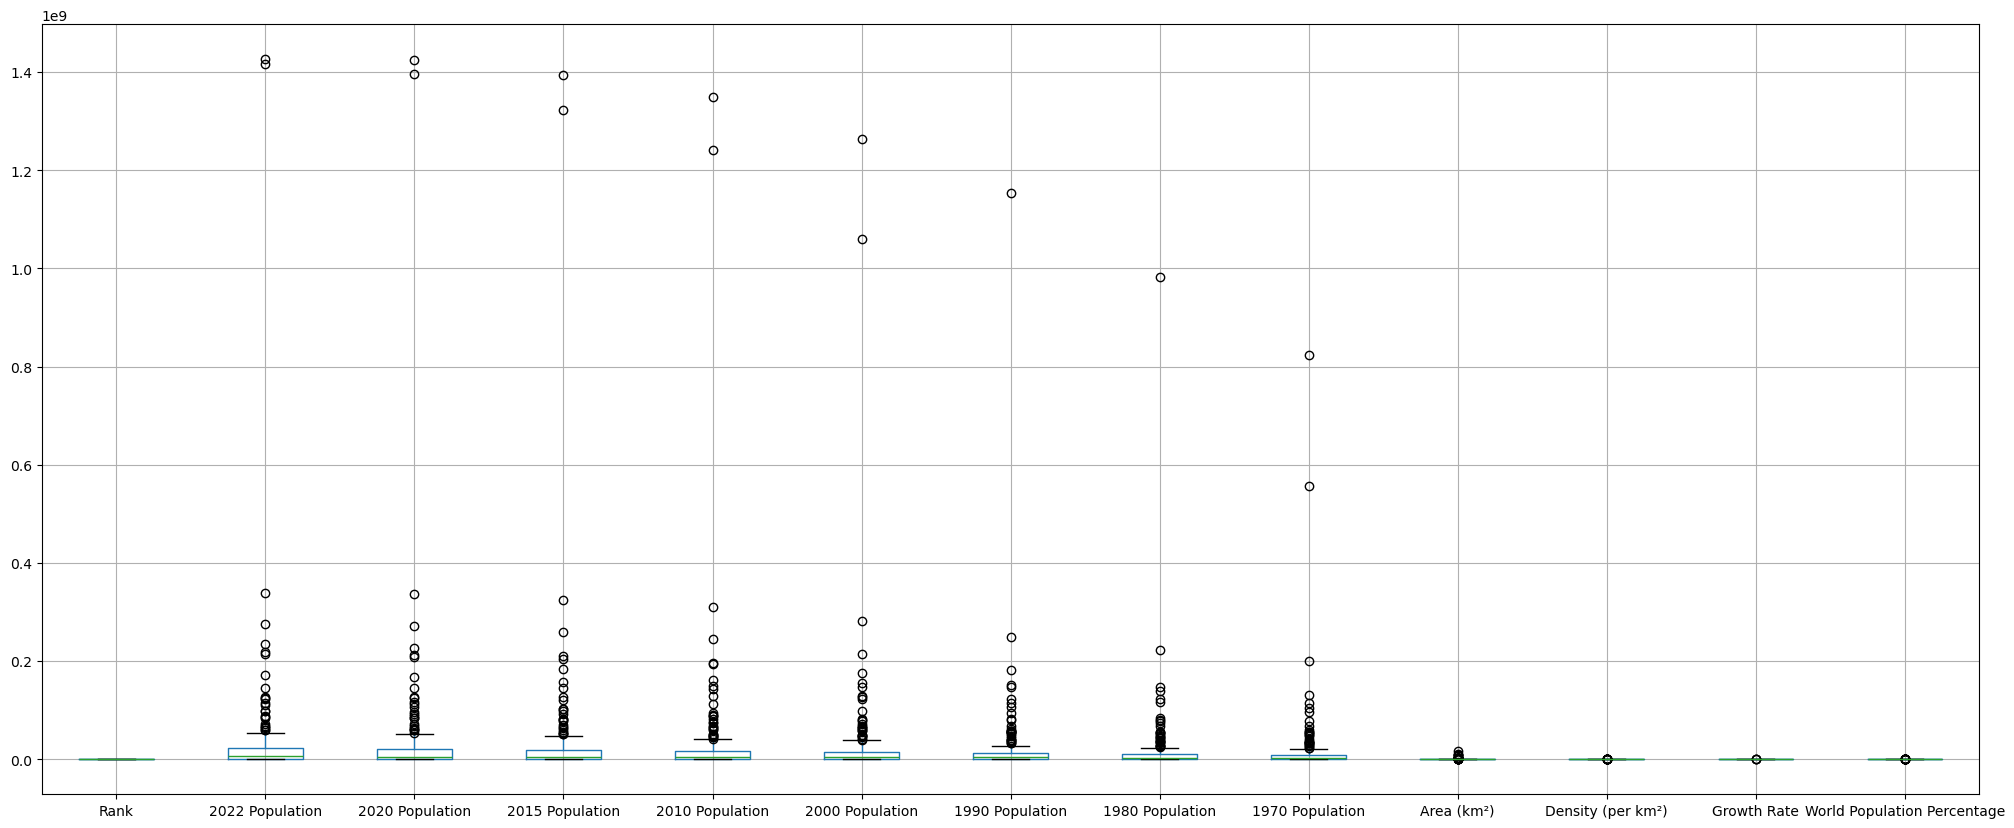

In [8]:
# Use boxplot to view outliers and distributions
df.boxplot(figsize = (25, 10))

The correlation heat map among columns with numeric datatypes show that the change in population of the countries was not statistically significant especially from 2010 to 2022 as the correlations between popualtions recorded in the time frame were all 1. Rank and population columns were negatively correlated as expected since greater the population the higher the ranking. The polulations and growth rate are negatively correlated by small numbers (> -0.01), and this is reasonable considering that the populations of populous countries can saturate over time.

In [12]:
# Correlation between all numeric values
num_df = df.select_dtypes(include=['number'])

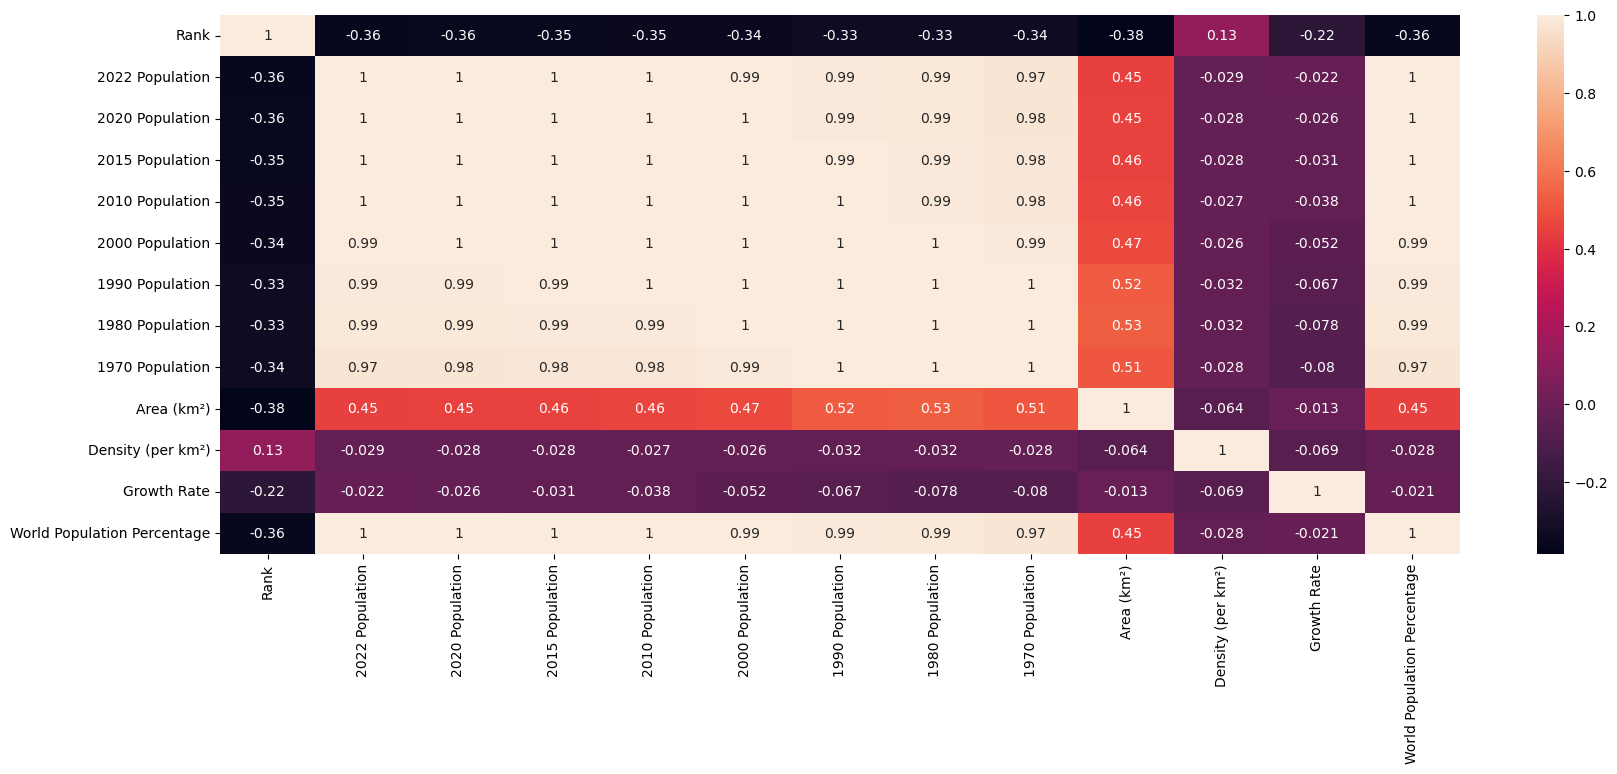

In [23]:
# Visualizae the correlation using heat map
sns.heatmap(num_df.corr(), annot = True)

plt.rcParams['figure.figsize'] = (20, 7)

plt.show()

The table below shows the 10 countries with the largest population in 2022 with five of them in Asia, 2 in North America 1 each in South America, Africa and Europe. The top two countries, China and India take up 17.88% and 17.77% of the world population, respectively and United States ranked third take up 4.24% which is significantly low compared to the other two. This explains the left-skewed distribution of values and outliers in World Population Percentage that was previously mentioned.

In [25]:
df_2022 = df.sort_values(by = '2022 Population', ascending = False).iloc[0:10]
df_2022[['Rank', 'Country', 'Continent', '2022 Population',  'Growth Rate', 'World Population Percentage']]
# OR
# df.sort_values(by = '2022 Population', ascending = False).head(10)

,Rank,Country,Continent,2022 Population,Growth Rate,World Population Percentage
41,1,China,Asia,"1,425,887,337.00",1.00,17.88
92,2,India,Asia,"1,417,173,173.00",1.01,17.77
221,3,United States,North America,"338,289,857.00",1.00,4.24
93,4,Indonesia,Asia,"275,501,339.00",1.01,3.45
156,5,Pakistan,Asia,"235,824,862.00",1.02,2.96
149,6,Nigeria,Africa,"218,541,212.00",1.02,2.74
27,7,Brazil,South America,"215,313,498.00",1.00,2.70
16,8,Bangladesh,Asia,"171,186,372.00",1.01,2.15
171,9,Russia,Europe,"144,713,314.00",1.00,1.81
131,10,Mexico,North America,"127,504,125.00",1.01,1.60


In [26]:
print(f"{sum(df_2022['World Population Percentage'])} % of the world's population reside in 10 most populous countries in 2022.")

57.3 % of the world's population reside in 10 most populous countries in 2022.


Approximately 57 % of the world's population resided in 10 most populaou countries in 2022. High population densities in certain regions strain infrastructure, housing, and public services, resulting in inadequate access to healthcare, education, and job opportunities that lead to social inequalities and spikes in pollution and emissions ([Population Media Centre](https://www.populationmedia.org/)).These issues are often more severe in countries with exceptionally high populations. To explore potential solutions to reducing population density disparity, the 10 most densely populated regions or countries were identified and their common characteristics were studied.

The figure below displays a bubble map of global population density, with the largest bubbles concentrated in Southeast Asia and Southern Europe. The table below lists the 10 most densely populated regions or countries, which are not the same as the ten most populous nations. However, these regions share some common characteristics that may provide insights into potential solutions for addressing global population density disparities.

The top six regions—Macau, Monaco, Singapore, Hong Kong, Gibraltar, and Bahrain— are known to serve as major financial and economic hubs despite their limited land areas. This concentration of wealth and business opportunities results in high living costs, an affluent population, and rapid urban development. Each of these regions also holds a unique political status and significant autonomy, especially Hong Kong and Macau, which operate as Special Administrative Regions of China with distinct economic systems.

In contrast, the lower 4 regions or countries - Maldives, Malta, Sint Maarten, Bermuda - are small islands known for their tourism sectors that capitalize on natural beauty and warm climates. Like financial hubs, these territories often have unique political statuses that grant them high autonomy, which aids their specialization in tourism or financial services. Bermuda, for example, is a British Overseas Territory with a high degree of self-governance, allowing it to implement policies that attract tourism.

These results suggest that population clustering can be reduced by by creating new districts, territories, or cities aimed at attracting tourism or finance hubs in less densely populated regions. This approach would not only reduce pressures in densely populated areas but also foster economic growth and urban development in underdeveloped regions. This creates job opportunities, infrastructure, and increased standards of living for local populations, similar to how Singapore or Dubai developed through strategic positioning as financial and tourism centers ([Harvard International Revies](https://hir.harvard.edu/singapore-dubai-model-opportunities-for-expansion-in-africa-latin-america-and-beyond/#:~:text=Both%20countries%20have%20constructed%20major,passengers%20during%20the%20same%20period.)).

In [10]:
df_density = df.sort_values(by = 'Density (per km²)', ascending = False).iloc[0:10]
df_density[['Rank', 'Country', 'Continent', '2022 Population',  'Growth Rate', 'World Population Percentage', 'Density (per km²)', 'Area (km²)']]

,Rank,Country,Continent,2022 Population,Growth Rate,World Population Percentage,Density (per km²),Area (km²)
119,167,Macau,Asia,"695,168.00",1.01,0.01,"23,172.27",30.00
134,217,Monaco,Europe,"36,469.00",0.99,0.00,"18,234.50",2.00
187,113,Singapore,Asia,"5,975,689.00",1.01,0.07,"8,416.46",710.00
89,104,Hong Kong,Asia,"7,488,865.00",1.00,0.09,"6,783.39","1,104.00"
76,219,Gibraltar,Europe,"32,649.00",1.00,0.00,"5,441.50",6.00
15,154,Bahrain,Asia,"1,472,233.00",1.01,0.02,"1,924.49",765.00
123,174,Maldives,Asia,"523,787.00",1.00,0.01,"1,745.96",300.00
125,173,Malta,Europe,"533,286.00",1.01,0.01,"1,687.61",316.00
188,214,Sint Maarten,North America,"44,175.00",1.00,0.00,"1,299.26",34.00
22,206,Bermuda,North America,"64,184.00",1.00,0.00,"1,188.59",54.00


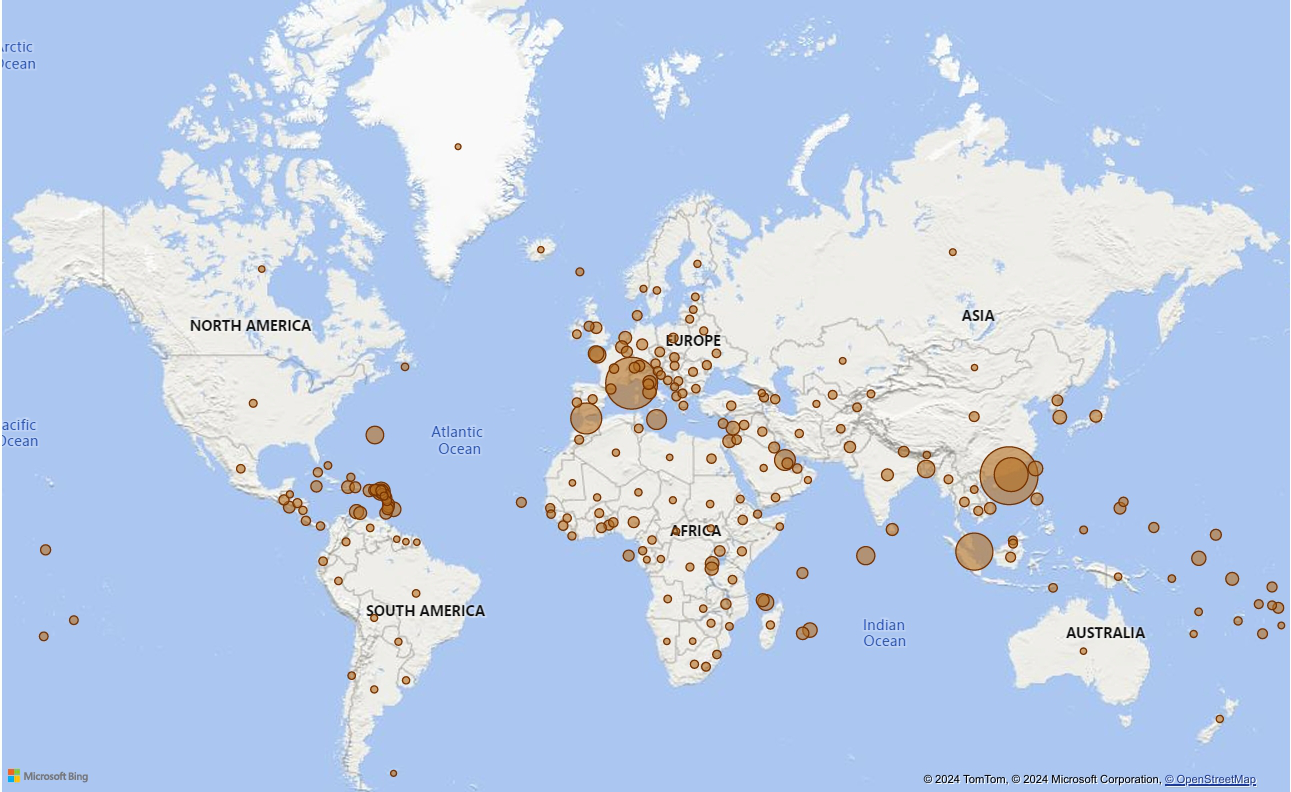

In [9]:
bubble = Image.open("C:/Users/Nahye/OneDrive - University of Toronto/Documents/Project/World Population/bubble map.jpeg")

bubble

The line graph below shows the population trends from 1970 to 2022 for the seven most populous countries in 2022. China and India experienced rapid population growth until around 2010, after which the growth began to slow. Similarly, the populations of the other five countries started to stabilize around this time. This trend is likely to be due to low fertility rates driven by urbanization, economic development, the high of living and education.

China and India have populations that far exceed those of other five countries in the graph, with little difference between them (1.426 billion and 1.417 billion, respectively, in 2022) and similar growth rates of 1.00 and 1.01. This supports many prior research few years ago suggesting that India’s population will eventually surpass China’s. According to the [UN](https://population.un.org/wpp/), India is indeed the most populous country in the world in 2024.

[UN](https://population.un.org/wpp/) also expects that India's population will increase to 1.515 billion by 2030 while China's population will decrease slightly to 1.416 billion by 2030. China’s one-child policy, introduced in 1979, directly contributed to its slower growth rate. Although the policy was adjusted to allow two children in 2015 and three in May 2021, China’s population is expected to continue declining due to the low fertility rates impacted by the poilcy and previously mentioned socioeconomic factors that developed countries are facing [(CNN)](https://www.cnn.com/2023/01/18/china/china-population-drop-explainer-intl-hnk/index.html). On the other hand, India's population is expected to grow despite of the drop in the fertility rate of 6 in 1960s to 2 in 2021 due to the considerable number of women entering their fertility years [(CNN)](https://www.cnn.com/2023/04/28/asia/india-population-overtakes-china-graphics-intl-hnk-dst-dg/index.html).

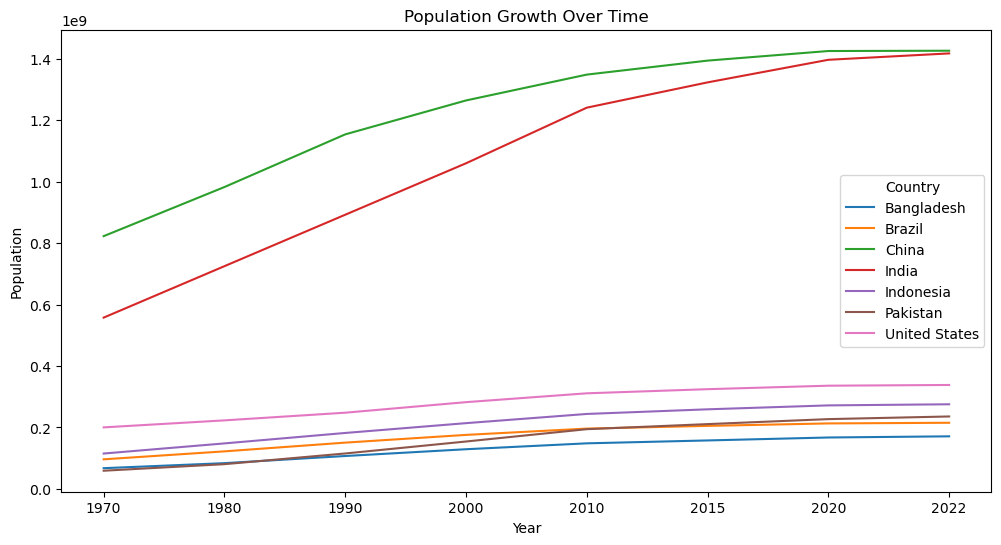

In [14]:
population_columns = ['1970 Population', '1980 Population', '1990 Population', 
                      '2000 Population', '2010 Population', '2015 Population', 
                      '2020 Population', '2022 Population']

countries_of_interest = ['China', 'India', 'United States', 'Indonesia', 'Pakistan', 'Bangladesh', 'Brazil']
df_countries = df[df['Country'].isin(countries_of_interest)]

# Melt the dataframe to plot populations over time for selected countries
df_melted = df_countries.melt(id_vars=["Country"], value_vars=population_columns, 
                              var_name='Year', value_name='Population')

df_melted['Year'] = df_melted['Year'].str.split().str[0]

plt.figure(figsize=(12, 6))
sns.lineplot(x='Year', y='Population', hue='Country', data=df_melted)
plt.title('Population Growth Over Time')
plt.show()

A polynomial regression model with a degree of 3 was used to predict the populations of China and India in 2030, and its accuracy was evaluated. The two graphs below display the polynomial regression fit to the data and the predicted populations of the countries for 2030 based on the model. According to this simple model, which does not account for socioeconomic status or growth rates of each country, the predicted populations for 2030, 2040, and 2050 were approximately the same: 1.452 billion, 1.451 billion, and 1.417 billion, respectively. The model underestimated India's population in 2030 by 63 million (4%) and overestimated China's population by 36 million (3%), which are significant discrepancies from a demographic perspective. This clearly highlights the limitations of the polynomial regression model in predicting future populations, especially when relying solely on past data, particularly for large numbers. 

This also suggests that socioeconomic factors, such as income levels, education, urbanization rates, fertility rates, healthcare access, and government policies, are crucial in building a more robust and accurate population model. Incorporating these factors would enable the model to account for the dynamic and complex nature of population growth, offering a more realistic projection of future trends. Without considering such variables, the model's predictions remain overly simplistic and may not accurately reflect the true population trajectories, especially in populous countries with rapidly changing social and economic landscapes.

In [15]:
# Prepare x and y variables for the polynomial regression model
years = [int(col.replace(' Population', '')) for col in population_columns]
years_linreg = [[year] for year in years]  # Reshape year data into a 2D array


In [16]:
China_df = df[df['Country'] == 'China'][population_columns]
China_population = [[int(pop)] for pop in China_df.values.flatten()]


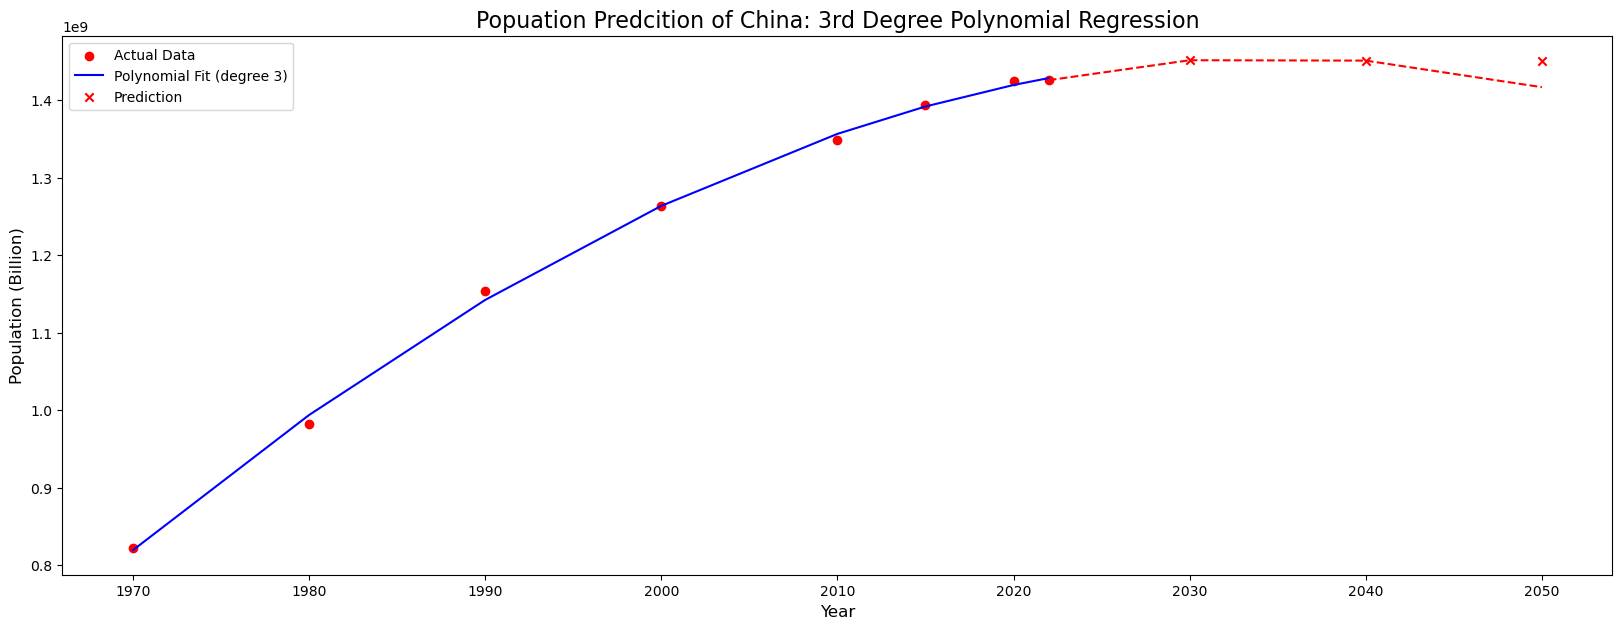

The poluation of China is predicted to be:
[1.452] billion in 2030
[1.451] billion in 2040
[1.417] billion in 2050


In [17]:
# Population Prediction of China

poly_params = np.polyfit(years, China_population, 3)

# Generate predictions for all years for visualization
predicted_population = np.polyval(poly_params, years)

#Visualize the data and the polynomial fit
plt.scatter(years, China_population, label='Actual Data', color = 'red')
plt.plot(years, predicted_population, label='Polynomial Fit (degree 3)', color='blue')

# 2030 prediction
predicted_population_2030 = np.polyval(poly_params, 2030)
plt.scatter(2030, predicted_population_2030, color= 'red', marker = 'x', label=f'Prediction')
plt.plot([years[-1], 2030], [China_population[-1], predicted_population_2030], 'r--')

# 2040 prediction
predicted_population_2040 = np.polyval(poly_params, 2040)
plt.scatter(2040, predicted_population_2040, color= 'red', marker = 'x')
plt.plot([2030, 2040], [predicted_population_2030, predicted_population_2040], 'r--')

# 2050 prediction
predicted_population_2050 = np.polyval(poly_params, 2050)
plt.scatter(2050, predicted_population_2040, color= 'red', marker = 'x')
plt.plot([2040, 2050], [predicted_population_2040, predicted_population_2050], 'r--')

# label
plt.xlabel('Year', fontsize = 12)
plt.ylabel('Population (Billion)', fontsize = 12)
plt.title('Popuation Predcition of China: 3rd Degree Polynomial Regression', fontsize = 16)
plt.legend()
plt.show()


# Print the predicted population for 2030
print("The poluation of China is predicted to be:")
print(f"{np.round(predicted_population_2030/(10**9), 3)} billion in 2030")
print(f"{np.round(predicted_population_2040/(10**9), 3)} billion in 2040")
print(f"{np.round(predicted_population_2050/(10**9), 3)} billion in 2050")

In [18]:
India_df = df[df['Country'] == 'India'][population_columns]
India_df.values

array([[5.57501301e+08,            nan,            nan, 1.05963368e+09,
        1.24061362e+09, 1.32286650e+09, 1.39638713e+09, 1.41717317e+09]])

In [19]:
# Omit NaNs in the model (1980 and 1990)
India_df = df[df['Country'] == 'India'][['1970 Population', '2000 Population', '2010 Population', '2015 Population', 
                                        '2020 Population', '2022 Population']]
India_years = [year for year in years if year != 1980 and year != 1990]
India_years_linreg = [[year] for year in India_years]

India_population = [[int(pop)] for pop in India_df.values.flatten()]


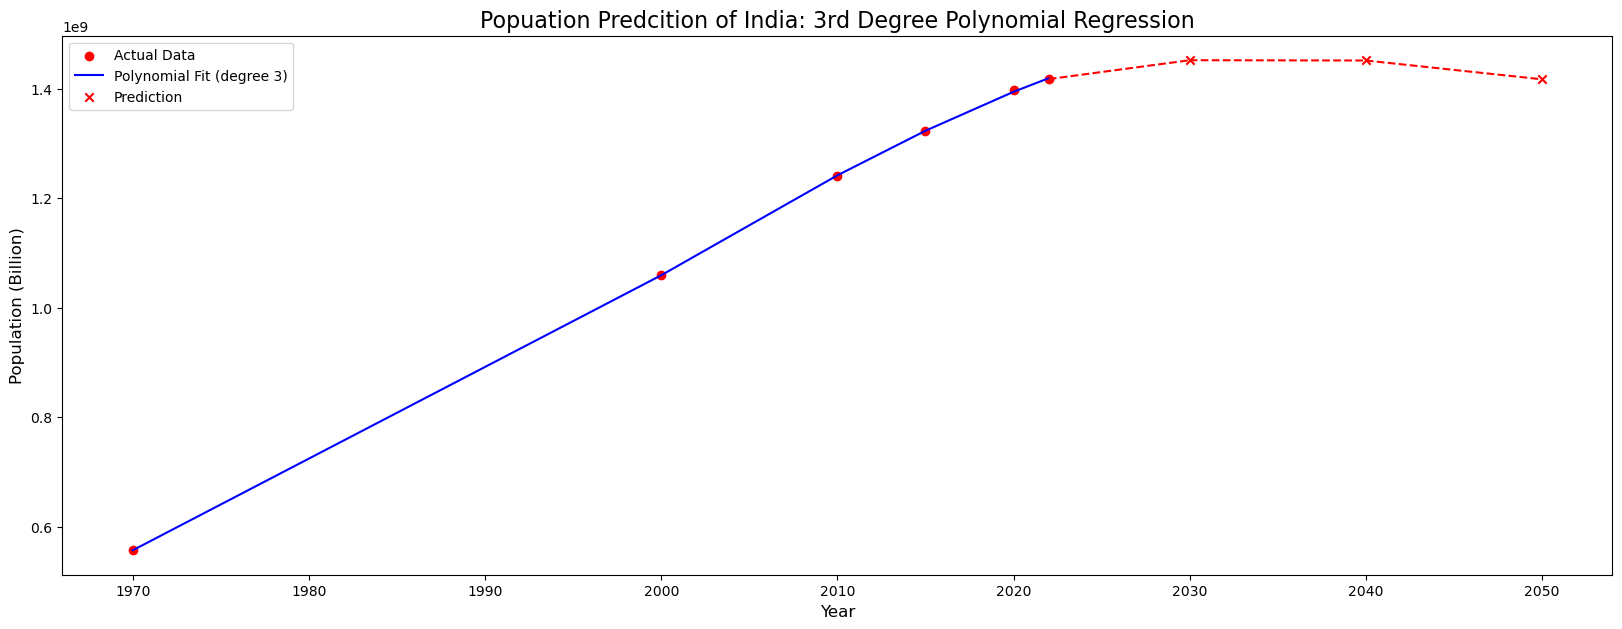

The poluation of India is predicted to be:
[1.452] billion in 2030
[1.451] billion in 2040
[1.417] billion in 2050


In [20]:
# Population Prediction of India

India_poly_params = np.polyfit(India_years, India_population, 3)

# Generate predictions for all years for visualization
India_predicted_population = np.polyval(India_poly_params, India_years)

#Visualize the data and the polynomial fit
plt.scatter(India_years, India_population, label='Actual Data', color = 'red')
plt.plot(India_years, India_predicted_population, label='Polynomial Fit (degree 3)', color='blue')

India_2030 = np.polyval(poly_params, 2030)
plt.plot([India_years[-1], 2030], [India_population[-1], India_2030], 'r--')
plt.scatter(2030, India_2030, color= 'red', marker = 'x', label=f'Prediction')

India_2040 = np.polyval(poly_params, 2040)
plt.scatter(2040, India_2040, color= 'red', marker = 'x')
plt.plot([2030, 2040], [India_2030, India_2040], 'r--')

India_2050 = np.polyval(poly_params, 2050)
plt.scatter(2050, India_2050, color= 'red', marker = 'x')
plt.plot([2040, 2050], [India_2040, India_2050], 'r--')


plt.xlabel('Year', fontsize = 12)
plt.ylabel('Population (Billion)', fontsize = 12)
plt.title('Popuation Predcition of India: 3rd Degree Polynomial Regression', fontsize = 16)
plt.legend()
plt.show()

# Print the predicted population
print("The poluation of India is predicted to be:")
print(f"{np.round(India_2030/(10**9), 3)} billion in 2030")
print(f"{np.round(India_2040/(10**9), 3)} billion in 2040")
print(f"{np.round(India_2050/(10**9), 3)} billion in 2050")

In [21]:
# Find total population of each continent and sort by 2022 mean population from the highest to the lowest.
df2 = df.groupby('Continent')[num_df.columns].sum().sort_values(by = '2022 Population', ascending = False)
df3 = df2.filter(items = population_columns)
df3

,1970 Population,1980 Population,1990 Population,2000 Population,2010 Population,2015 Population,2020 Population,2022 Population
Continent,,,,,,,,
Asia,"2,104,314,136.00","1,933,360,000.00","2,334,719,776.00","3,706,718,415.00","4,187,125,190.00","4,458,250,182.00","4,652,801,584.00","4,720,041,978.00"
Africa,"361,194,640.00","480,817,791.00","637,110,013.00","817,508,493.00","1,020,502,655.00","1,156,663,993.00","1,360,671,810.00","1,425,529,262.00"
Europe,"655,923,991.00","681,600,217.00","709,689,789.00","726,066,600.00","735,613,934.00","736,345,252.00","745,792,196.00","737,713,219.00"
North America,"315,434,606.00","368,293,361.00","421,266,425.00","486,069,584.00","542,720,651.00","570,383,850.00","594,236,593.00","600,296,136.00"
South America,"192,947,156.00","241,789,006.00","297,146,415.00","325,206,553.00","348,262,142.00","413,134,396.00","431,530,043.00","436,816,608.00"
Oceania,"19,480,270.00","22,920,240.00","26,743,822.00","31,222,778.00","37,102,764.00","40,403,283.00","43,933,426.00","45,020,499.00"


The graph below represents the populations of the six continents from 1970 to 2022. Asia has consistently been the most populous continent, while Oceania has remained the least populous throughout this period. Asia experienced a dramatic population increase from 1990 to 2000, largely driven by rapidly developing countries such as China and India.

Overall, Asia’s population grew significantly between each time point until 2010, with more volatile changes. In contrast, the populations of the other continents grew more steadily over the same period.

Africa's population surpassed Europe's around 1995, making Africa the second most populous continent by the early 21st century. This shift can be attributed to factors such as a high fertility rate, declining mortality rate, and increasing life expectancy in Africa, as highlighted in [research](https://www.scirp.org/journal/paperinformation?paperid=103878#:~:text=Infant%20mortality%20rates%20in%20African,rapid%20growth%20of%20Africa's%20population.) from 2020.

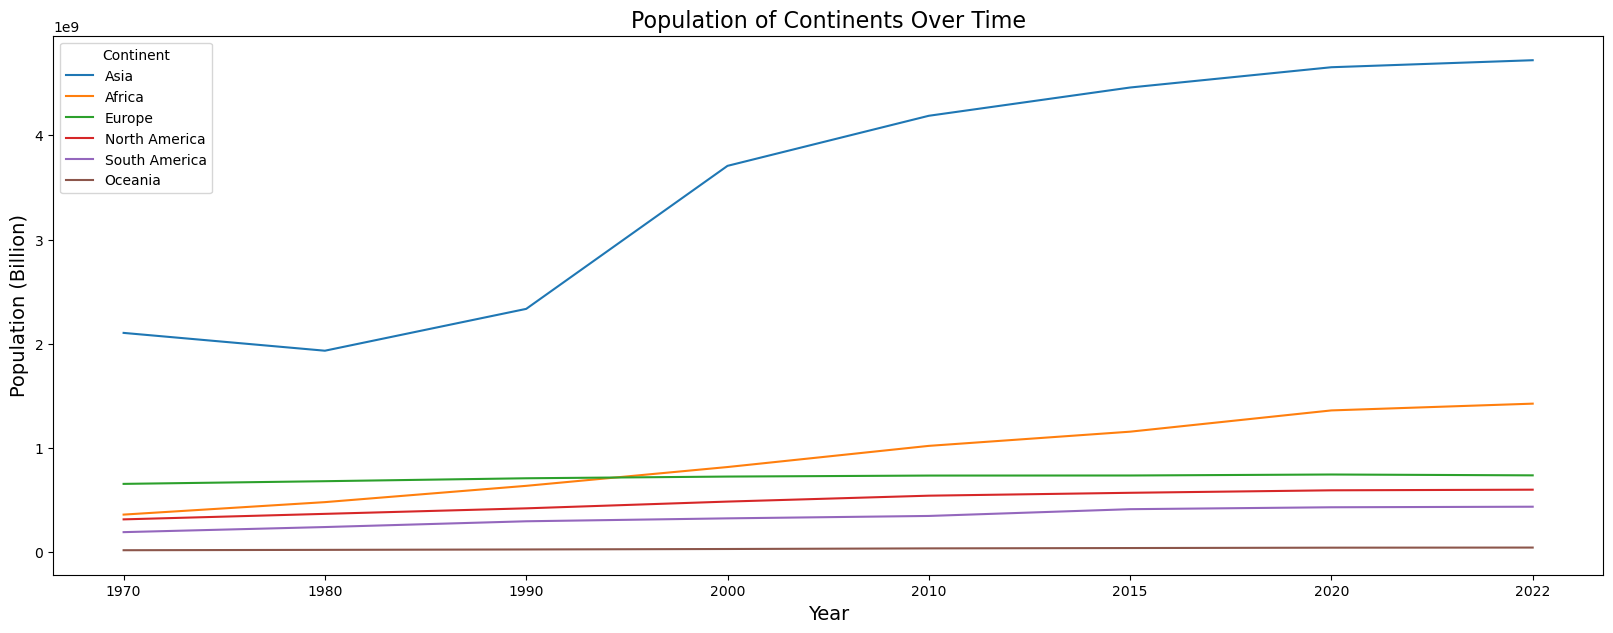

In [22]:
df3.columns = [col.replace(' Population', '') for col in df3.columns]

# Transpose and plot the data
df3.transpose().plot()

# Add title and labels
plt.title("Population of Continents Over Time", fontsize = 16)
plt.xlabel("Year", fontsize = 14)
plt.ylabel("Population (Billion)", fontsize = 14)

# Display the plot
plt.show()

To conclude, this analysis focused on the disparities in population distribution and density per area across countries. The population data revealed a left-skewed distribution, where the majority of countries have relatively small populations, while a few countries, such as China and India, dominate global population figures. 

By analyzing the 10 most densely populated regions, the project emphasizes that reducing global population density disparity requires a multi-faceted approach. Encouraging migration to less populated areas, improving access to education, and implementing sustainable development strategies could help alleviate pressures in densely populated regions. These actions not only promote more balanced growth but also ensure a fairer distribution of resources and opportunities for all nations.

Furthermore, the polynomial regression model used to predict the future populations of India and China for 2030, 2040, and 2050 highlighted some key limitations. The model does not account for variables such as government policies, economic shifts, or unforeseen global crises that can significantly impact population growth rates. As a result, the model underestimated population of India in 2030 by 63 million and overestimated population of China in 2030 by 36 million, suggesting that a more accurate model should employ more complex model than a polynomia regression model and take account for socioeconomic factors.